In [1]:
import pandas as pd

file1 = '/Users/chuck/Desktop/3-1/우주환경1/우주환경1 과제/GOES-15 p27e csv/total/g15_epead_p27e_32s_resampled.txt'
file2 = '/Users/chuck/Desktop/3-1/우주환경1/우주환경1 과제/GOES-15 xrs csv/total/g15_xrs_32s_resampled.txt'

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)



date = data1['Time']
p3e_flux = data1['P3E_FLUX']
p4e_flux = data1['P4E_FLUX']
p5e_flux = data1['P5E_FLUX']
p6e_flux = data1['P6E_FLUX']
p7e_flux = data1['P7E_FLUX']
a_flux = data2['A_FLUX']
b_flux = data2['B_FLUX']

data_P = pd.DataFrame({'Time':date, 'P3E_FLUX':p3e_flux, 'P4E_FLUX':p4e_flux, 'P5E_FLUX':p5e_flux, 'P6E_FLUX':p6e_flux, 'P7E_FLUX':p7e_flux})
data_X = pd.DataFrame({'Time':date, 'A_FLUX':a_flux, 'B_FLUX':b_flux})

data_p = data_P.copy()
data_x = data_X.copy()

data_p['Time'] = pd.to_datetime(data_p['Time'])
data_p['P3E_FLUX'] = pd.to_numeric(data_p['P3E_FLUX'])
data_p['P4E_FLUX'] = pd.to_numeric(data_p['P4E_FLUX'])
data_p['P5E_FLUX'] = pd.to_numeric(data_p['P5E_FLUX'])
data_p['P6E_FLUX'] = pd.to_numeric(data_p['P6E_FLUX'])
data_p['P7E_FLUX'] = pd.to_numeric(data_p['P7E_FLUX'])

data_x['Time'] = pd.to_datetime(data_x['Time'])
data_x['A_FLUX'] = pd.to_numeric(data_x['A_FLUX'])
data_x['B_FLUX'] = pd.to_numeric(data_x['B_FLUX'])

data_p = data_p.set_index('Time').loc[:, 'P3E_FLUX':'P7E_flux'].apply(pd.to_numeric)
data_x = data_x.set_index('Time').loc[:, 'A_FLUX':'B_FLUX'].apply(pd.to_numeric)

print(data_x.dtypes)


A_FLUX    float64
B_FLUX    float64
dtype: object


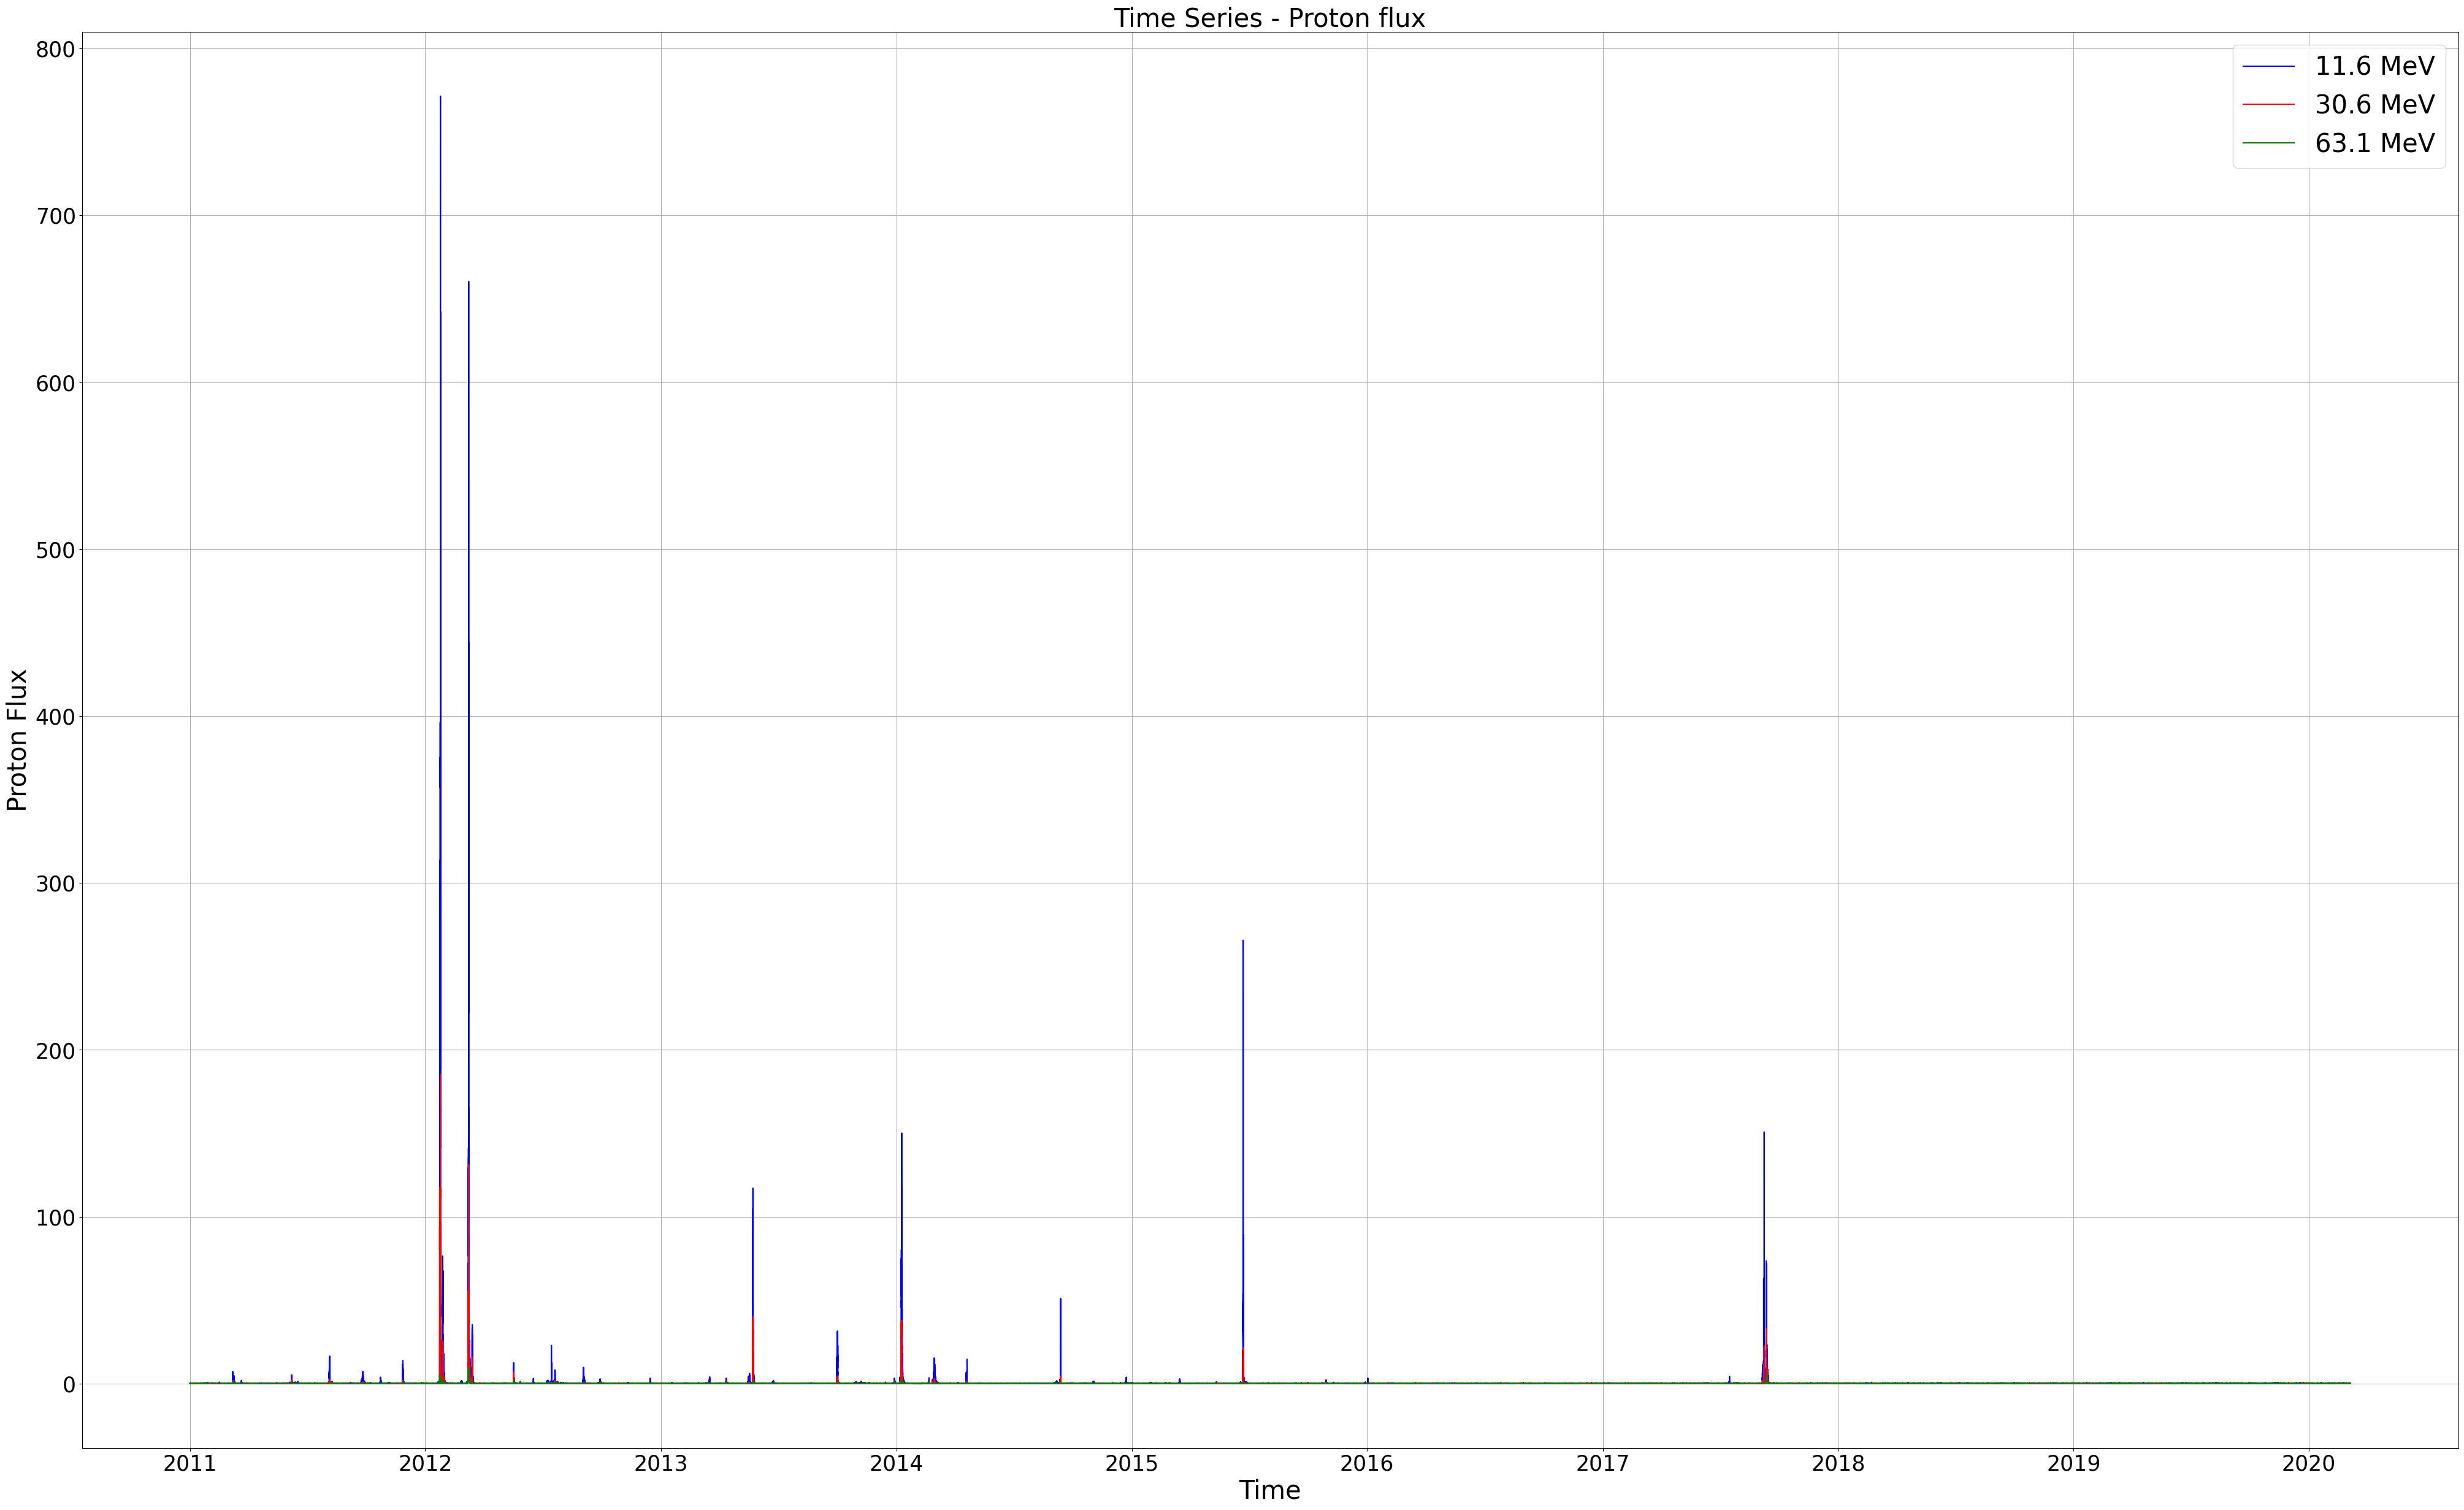

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 30))
plt.plot(data_p.index, data_p['P3E_FLUX'][:], label='11.6 MeV', c='b')
plt.plot(data_p.index, data_p['P4E_FLUX'][:], label='30.6 MeV', c='r')
plt.plot(data_p.index, data_p['P5E_FLUX'][:], label='63.1 MeV', c='g')
#plt.plot(data_p['Time'], data_p['P6E_FLUX'][:], label='165 MeV', c='darkorange')
#plt.plot(data_p['Time'], data_p['P7E_FLUX'][:], label='433 MeV', c='black')
plt.title('Time Series - Proton flux', fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Proton Flux', fontsize=30)
plt.yticks(fontsize = 25)
plt.xticks(fontsize=25)
plt.grid(True)
plt.legend(fontsize=30)


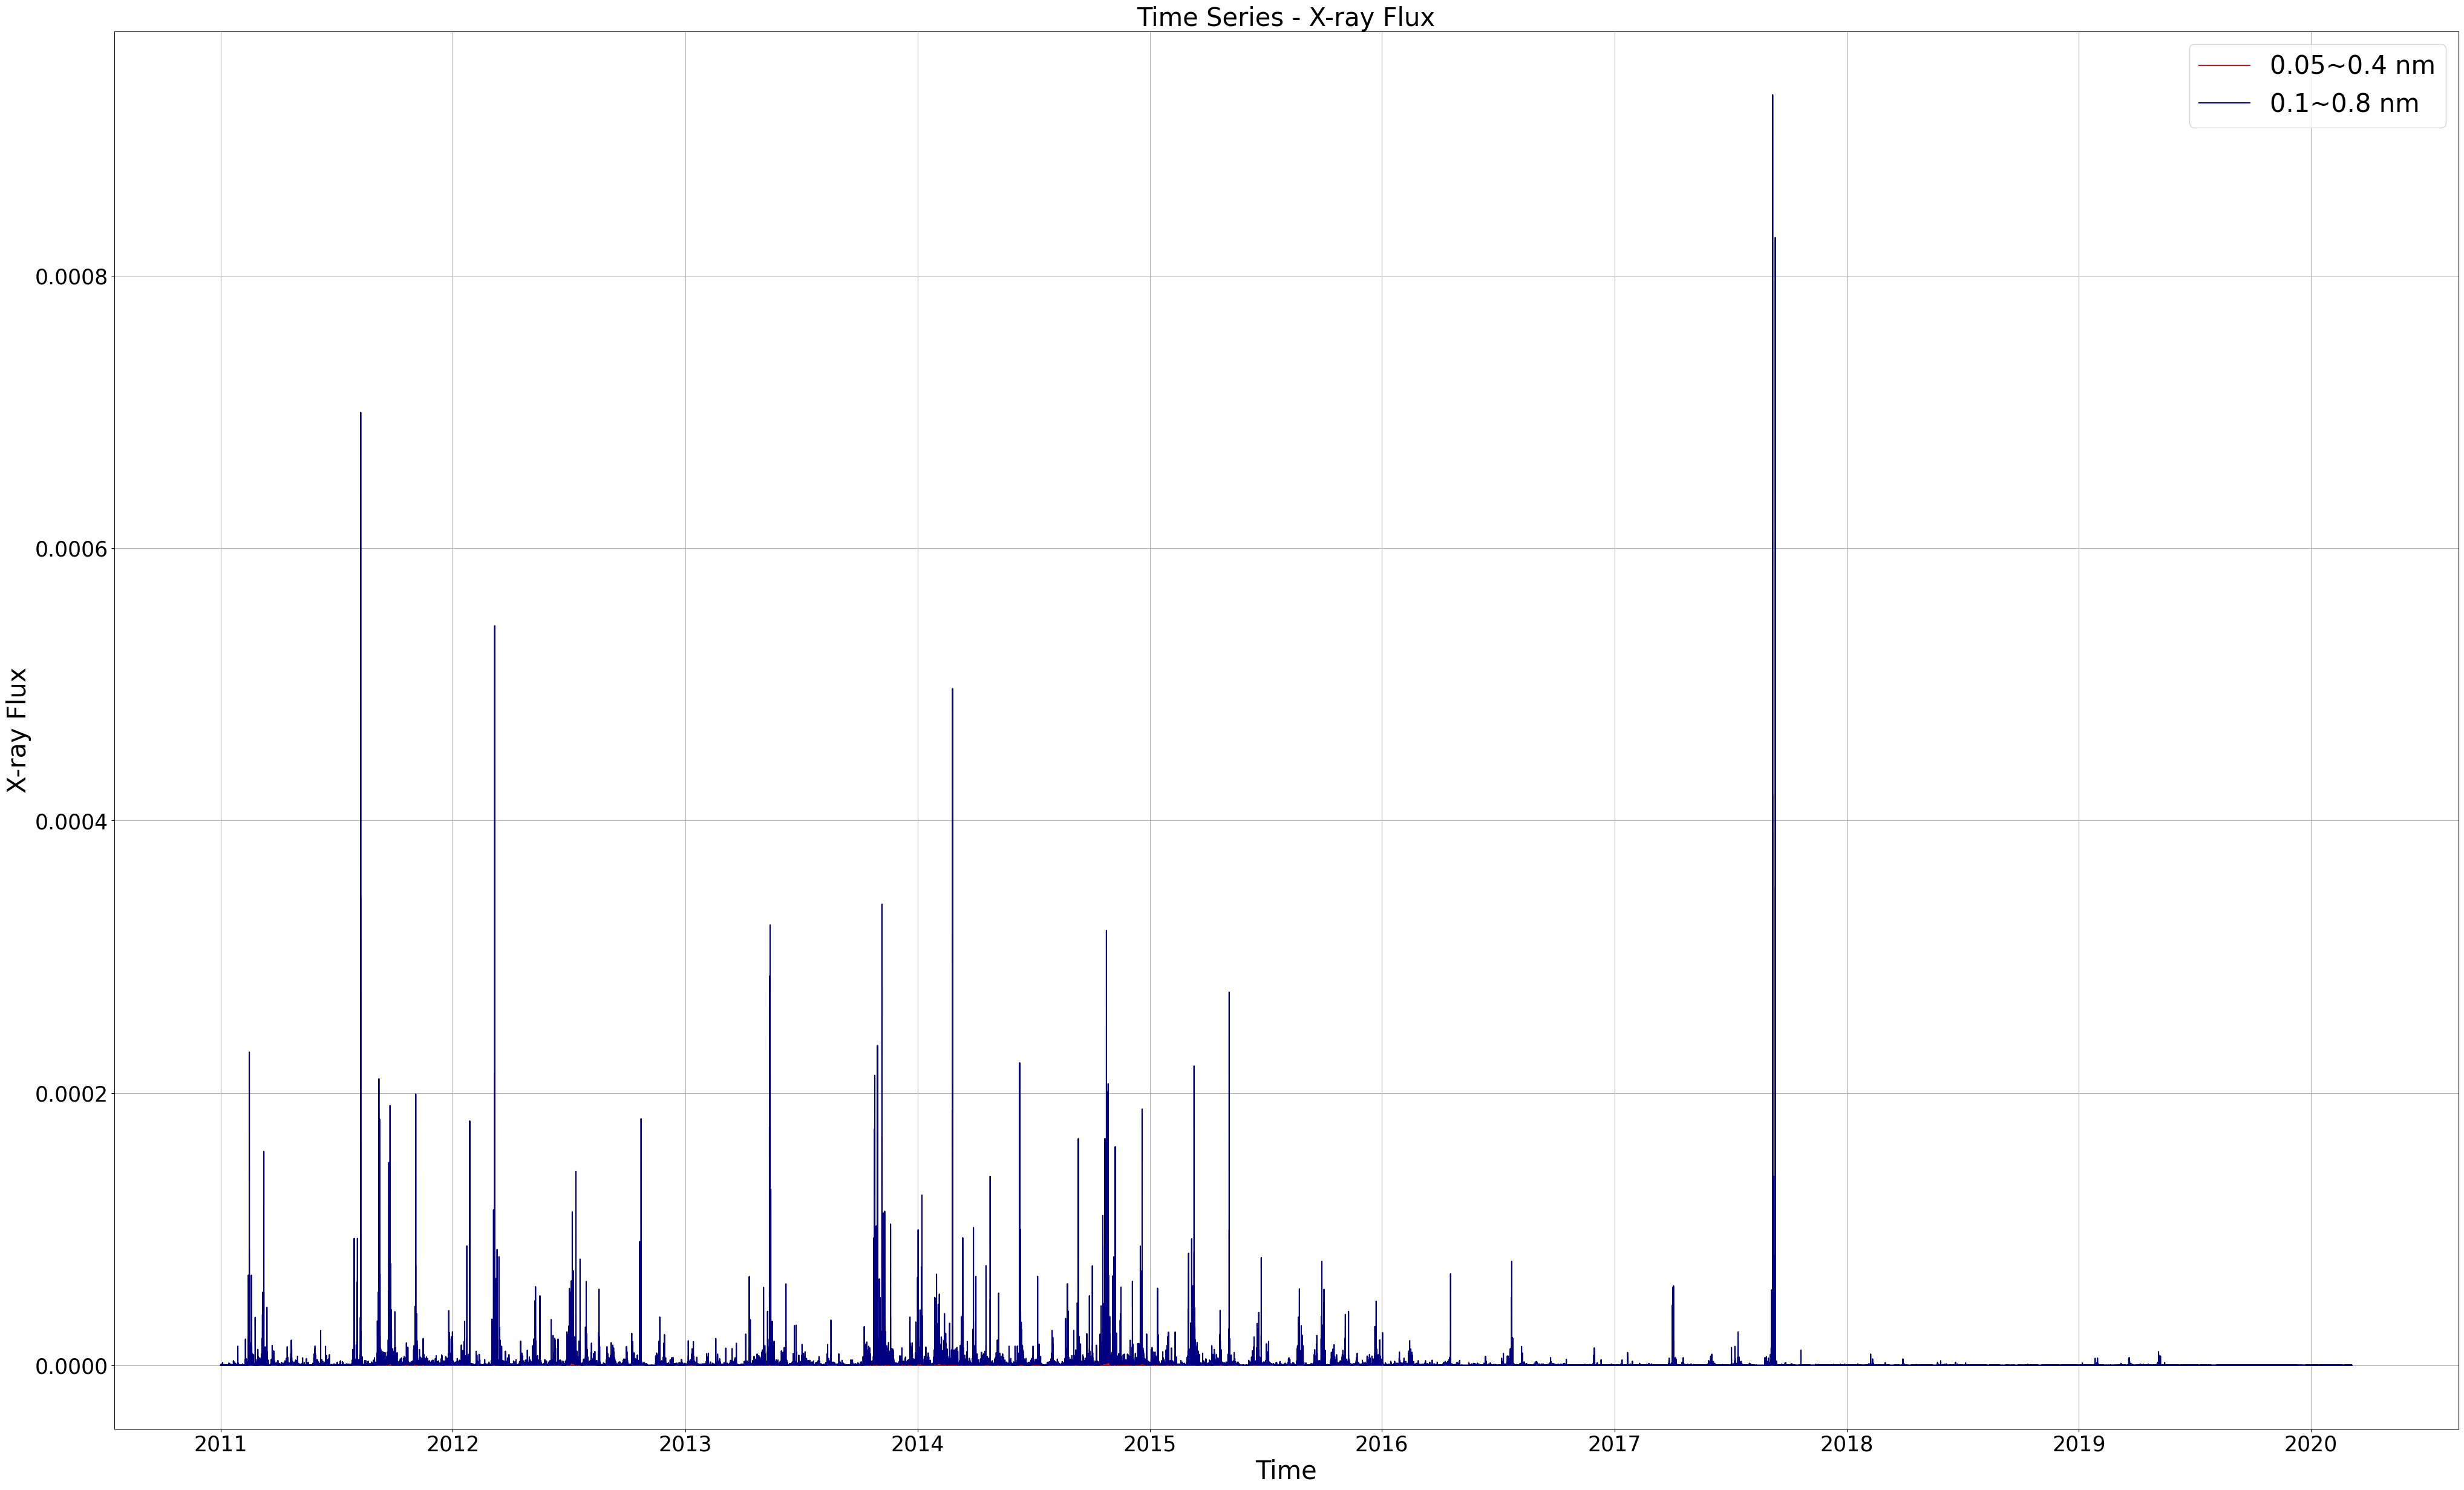

In [3]:
plt.figure(figsize=(50, 30))
plt.plot(data_x.index, data_x['A_FLUX'][:], label='0.05~0.4 nm', c='firebrick')
plt.plot(data_x.index, data_x['B_FLUX'][:], label='0.1~0.8 nm', c='navy')
plt.title('Time Series - X-ray Flux', fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.ylabel('X-ray Flux', fontsize=30)
plt.yticks(fontsize = 25)
plt.xticks(fontsize=25)
plt.grid(True)
plt.legend(fontsize=30)

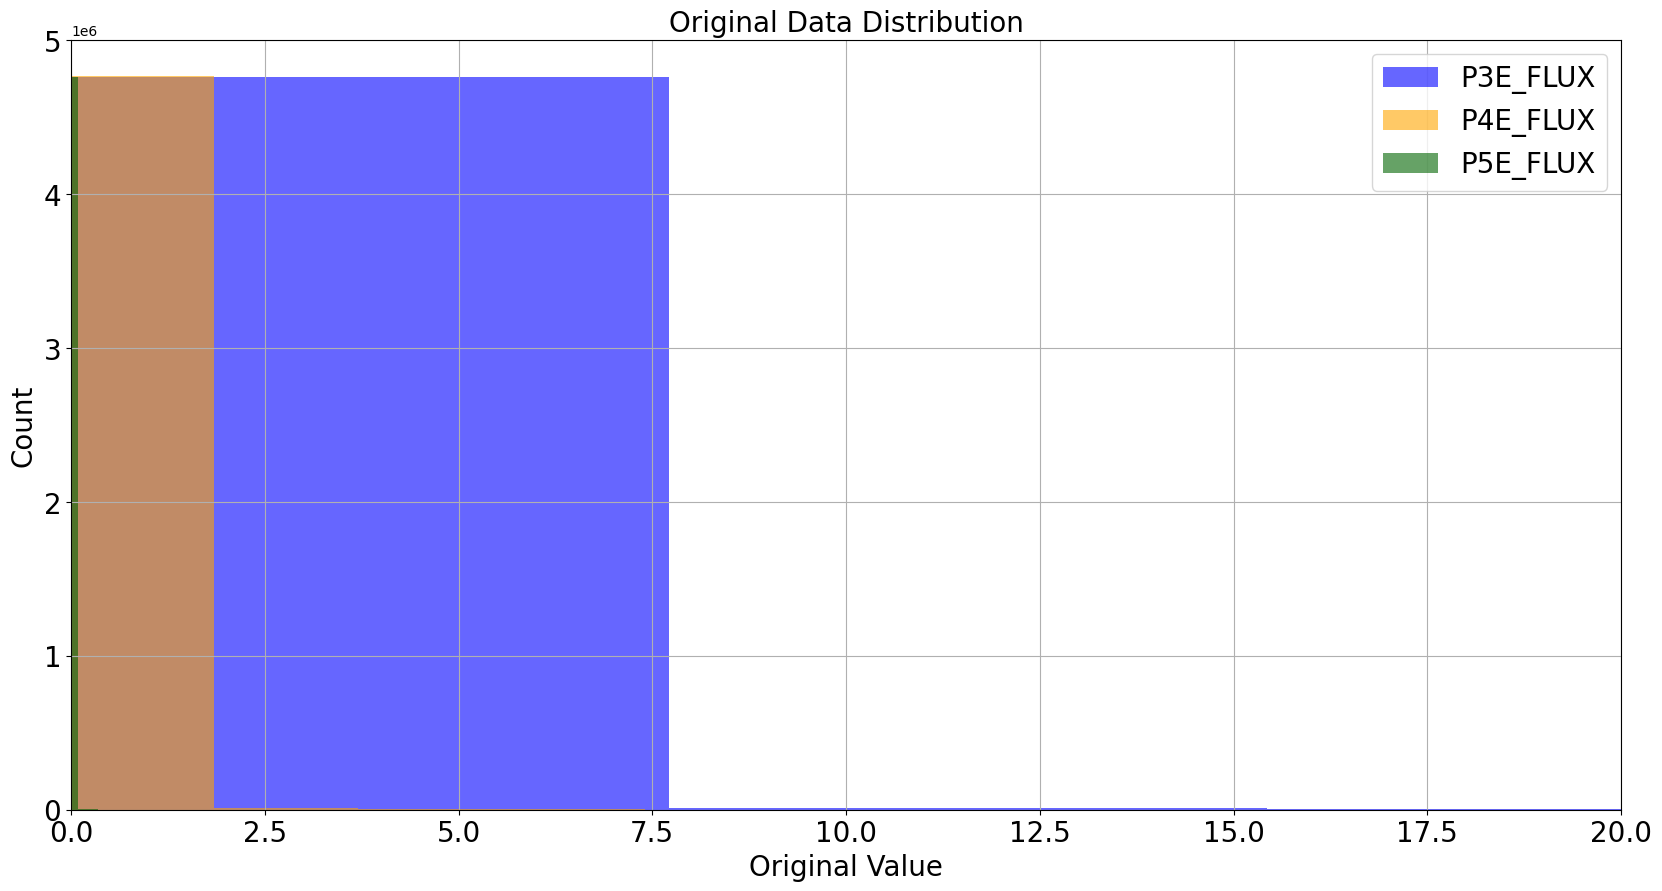

In [4]:
# dynamic range (proton flux)

feature_0 = data_p.columns[0]
feature_1 = data_p.columns[1]
feature_2 = data_p.columns[2]

plt.figure(figsize=(20, 10))
plt.hist(data_p[feature_0], bins=100, alpha=0.6, label=feature_0, color='blue')
plt.hist(data_p[feature_1], bins=100, alpha=0.6, label=feature_1, color='orange')
plt.hist(data_p[feature_2], bins=100, alpha=0.6, label=feature_2, color='darkgreen')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Original Data Distribution', fontsize=20)
plt.xlabel('Original Value', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
plt.xlim(0, 20)
plt.grid(True)
plt.show()

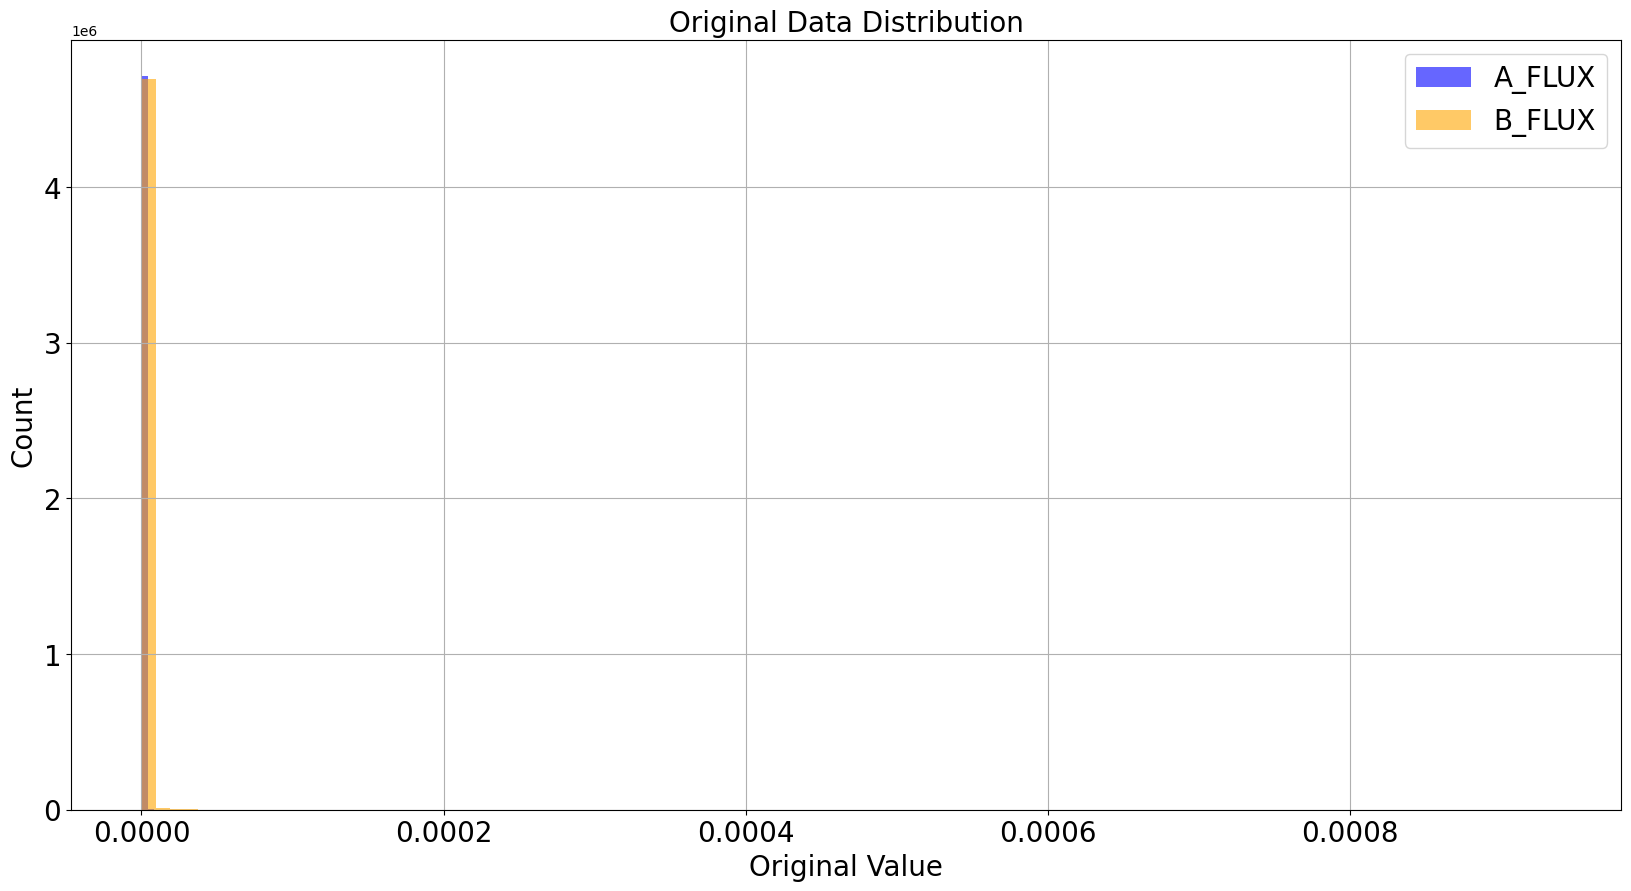

In [5]:
# dynamic range (x-ray flux)

feature_0 = data_x.columns[0]
feature_1 = data_x.columns[1]

plt.figure(figsize=(20, 10))
plt.hist(data_x[feature_0], bins=100, alpha=0.6, label=feature_0, color='blue')
plt.hist(data_x[feature_1], bins=100, alpha=0.6, label=feature_1, color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Original Data Distribution', fontsize=20)
plt.xlabel('Original Value', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
plt.grid(True)
plt.show()

In [6]:
import numpy as np

data = data_p[['P3E_FLUX', 'P4E_FLUX', 'P5E_FLUX']]
data['A_FLUX'] = data_x['A_FLUX']
data['B_FLUX'] = data_x['B_FLUX']
data['label_p3e'] = (data['P3E_FLUX'] >= 1).astype(int)
data['label_p4e'] = (data['P4E_FLUX'] >= 1).astype(int)
data['label_p5e'] = (data['P5E_FLUX'] >= 1).astype(int)

data.interpolate(method='cubic', inplace=True)
data.isnull().any()

/var/folders/c7/k73_191s3s5crnwl0qf1t4sm0000gn/T/ipykernel_74091/3184009334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['A_FLUX'] = data_x['A_FLUX']


P3E_FLUX     False
P4E_FLUX     False
P5E_FLUX     False
A_FLUX       False
B_FLUX       False
label_p3e    False
label_p4e    False
label_p5e    False
dtype: bool

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:

scalar = StandardScaler()
data[['P3E_FLUX', 'P4E_FLUX', 'P5E_FLUX', 'A_FLUX', 'B_FLUX']] = scalar.fit_transform(data[['P3E_FLUX', 'P4E_FLUX', 'P5E_FLUX', 'A_FLUX', 'B_FLUX']])


def create_sequences(data, input_length, output_length, target_column):
    inputs = []
    outputs = []
    timestamps = []

    for i in range(len(data) - input_length - output_length):
        input_seq = data.iloc[i:i+input_length].values
        output_seq = data.iloc[i+input_length:i+input_length+output_length][target_column].values
        inputs.append(input_seq)
        outputs.append(output_seq)
        timestamps.append(data.iloc[i+input_length:i+input_length+output_length].index)

    return np.array(inputs), np.array(outputs), np.array(timestamps)

input_length = 32
output_length = 32
X, Y, timestamps= create_sequences(data, input_length, output_length, target_column='P5E_FLUX')

In [10]:

X_train, X_temp, Y_train, Y_temp, timestamps_train, timestamps_temp = train_test_split(X, Y, timestamps, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test, timestamps_valid, timestamps_test = train_test_split(X_temp, Y_temp, timestamps_temp, test_size=0.5, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(32).shuffle(buffer_size=1000)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, Y_valid)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(32)

print(X_train.shape)
print(Y_train.shape)


(3377763, 32, 8)
(3377763, 32)


In [11]:
print(len(train_dataset), len(valid_dataset), len(test_dataset))

105556 22619 22619


In [12]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, BatchNormalization, ReLU, Flatten

def build_tcn_model(input_shape, output_length):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, dilation_rate=1, padding='causal', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(Conv1D(filters=64, kernel_size=2, dilation_rate=2, padding='causal'))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(Flatten())
    model.add(Dense(output_length, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
output_length = Y_train.shape[1]
model = build_tcn_model(input_shape, output_length)

model.summary()


/Users/chuck/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 32, 64)         │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 32, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        65,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,424 (294.62 KB)

 Trainable params: 75,168 (293.62 KB)

 Non-trainable params: 256 (1.00 KB)

In [13]:
# 학습 콜백 정의
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_tcn_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
105556/105556 ━━━━━━━━━━━━━━━━━━━━ 285s 3ms/step - loss: 0.1341 - mae: 0.0742 - val_loss: 0.1914 - val_mae: 0.0562
Epoch 2/100
105556/105556 ━━━━━━━━━━━━━━━━━━━━ 319s 3ms/step - loss: 0.0306 - mae: 0.0352 - val_loss: 0.1002 - val_mae: 0.0490
Epoch 3/100
105556/105556 ━━━━━━━━━━━━━━━━━━━━ 314s 3ms/step - loss: 0.0235 - mae: 0.0332 - val_loss: 0.1037 - val_mae: 0.0482
Epoch 4/100
105556/105556 ━━━━━━━━━━━━━━━━━━━━ 325s 3ms/step - loss: 0.0209 - mae: 0.0317 - val_loss: 0.0784 - val_mae: 0.0451
Epoch 5/100
105556/105556 ━━━━━━━━━━━━━━━━━━━━ 334s 3ms/step - loss: 0.0194 - mae: 0.0308 - val_loss: 0.1049 - val_mae: 0.0516
Epoch 6/100
105556/105556 ━━━━━━━━━━━━━━━━━━━━ 326s 3ms/step - loss: 0.0179 - mae: 0.0304 - val_loss: 0.0916 - val_mae: 0.0468
Epoch 7/100
105556/105556 ━━━━━━━━━━━━━━━━━━━━ 328s 3ms/step - loss: 0.0166 - mae: 0.0298 - val_loss: 0.1155 - val_mae: 0.0490
Epoch 8/100
105556/105556 ━━━━━━━━━━━━━━━━━━━━ 340s 3ms/step - loss: 0.0158 - mae: 0.0295 - val_loss: 0.1288 - 

In [14]:
test_loss, test_mae = model.evaluate(test_dataset)
print(f'Test_loss: {test_loss}, Test MAE: {test_mae}')

22619/22619 ━━━━━━━━━━━━━━━━━━━━ 20s 871us/step - loss: 0.0777 - mae: 0.0449
Test_loss: 0.07671448588371277, Test MAE: 0.04473015293478966


In [15]:
predictions = model.predict(X_test)

22619/22619 ━━━━━━━━━━━━━━━━━━━━ 23s 994us/step


In [16]:
def plot_predictions(timestamps, true_values, predicted_values):
    plt.figure(figsize=(15, 6))
    for i in range(len(timestamps)):
        plt.plot(timestamps[i], true_values[i], label='True', color='blue')
        plt.plot(timestamps[i], predicted_values[i], label='predicted', color='red', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Proton Flux')
    plt.title('True vs Predicted Proton Flux')
    plt.legend()
    plt.show()

plot_predictions(timestamps_test, Y_test, predictions)

: 